문제 정의 -> 데이터 수집 -> 데이터 전처리 -> 모델 찾기 -> 시각화 응용

Deep Learning , Muchine Learning, Master 개론

In [1]:
import pandas as pd
import numpy as np

In [ ]:
import pickle

with open("user.pkl", "rb") as f :
    result = pickle.load(f)

In [3]:
result.tail(3)

,UserID,Name,Age,Money
5,6,Andrew,30,24000
6,7,Alvin,37,14000
7,8,Arnold,29,5000


In [6]:
# csv 저장
# 문제가 생기면 shilft + tab 에서 options 찾아서 해결
result.to_csv("foo.csv", index=False)

In [7]:
# load
df = pd.read_csv("foo.csv")
df.tail(3)

,UserID,Name,Age,Money
5,6,Andrew,30,24000
6,7,Alvin,37,14000
7,8,Arnold,29,5000


In [2]:
# excel 저장
# encoding 문제가 많다
# cp949 utf-8 utf-16 -> excel / latin euc-kr -> crolling
# excel 열어서 데이터 가져오기 csv 인 경우 인코딩 방식을 결정할 수 있다.

df.to_excel('foo.xslx', sheet_name='Sheef1', engine='xslxwritter', encoding='utf-8-sig')

In [ ]:
# pivot

In [2]:
titanic = pd.read_csv('titanic/train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# 카테고리 데이터는 one hot encoding 한다.
# dummy 변수, scaling
# sampling (down, up)

In [12]:
# 성별과 좌석등급에 따른 데이터 프레임

titanic_df1 = titanic.groupby(['Sex', 'Pclass']).size().reset_index(name="Counts")
titanic_df1

,Sex,Pclass,Counts
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


In [13]:
#pivoc index, column, value

titanic_df2 = titanic_df1.pivot('Sex', 'Pclass', 'Counts')
titanic_df2

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [15]:
# 성별에 따른 생존자 수

df2 = titanic.groupby(['Sex', 'Survived']).size().reset_index(name="Counts")
df2

,Sex,Survived,Counts
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [16]:
df2.pivot('Sex', 'Survived', 'Counts')

Survived,0,1
Sex,,
female,81,233
male,468,109


In [17]:
# 객실 등급에 따른 생존자 수

df3 = titanic.groupby(['Pclass', 'Survived']).size().reset_index(name="Counts")
df3

,Pclass,Survived,Counts
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [18]:
result = df3.pivot('Pclass', 'Survived', 'Counts')
result

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [19]:
titanic['Counts'] = 1
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Counts
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1


In [21]:
titanic.pivot_table('Counts', ['Sex', 'Survived'], ['Pclass'], aggfunc=np.sum)

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

In [22]:
titanic.pivot_table('Counts', ['Sex', 'Pclass'], ['Survived'], aggfunc=np.sum)

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [24]:
df = titanic.pivot_table('Counts', ['Survived'], ['Sex'], aggfunc=np.sum)
df

Sex,female,male
Survived,,
0,81,468
1,233,109


In [29]:
df['total'] = df['female'] +  df['male']
df

Sex,female,male,total
Survived,,,
0,81,468,549
1,233,109,342


In [30]:
df.loc['total'] = df.loc[0] + df.loc[1]
df

Sex,female,male,total
Survived,,,
0,81,468,549
1,233,109,342
total,314,577,891


In [32]:
df.drop('total', inplace=True)
df

Sex,female,male,total
Survived,,,
0,81,468,549
1,233,109,342


In [33]:
df.drop('total', axis=1, inplace=True)
df

Sex,female,male
Survived,,
0,81,468
1,233,109


In [36]:
df = titanic.pivot_table('Counts', ['Survived'], ['Pclass', 'Parch'], aggfunc=np.sum, dropna=False, fill_value=0)
df

Pclass     1                       2          ...             3                \
Parch      0   1   2  3  4  5  6   0   1   2  ...  4  5  6    0   1   2  3  4   
Survived                                      ...                               
0         64  10   5  0  1  0  0  86   8   3  ...  0  0  0  295  35  32  2  3   
1         99  21  16  0  0  0  0  48  24  13  ...  0  0  0   86  20  11  1  0   

Pclass          
Parch     5  6  
Survived        
0         4  1  
1         1  0  

[2 rows x 21 columns]

In [38]:
# 최대 행/열 수
pd.options.display.max_rows, pd.options.display.max_columns 

(60, 20)

In [39]:
pd.options.display.max_columns = 21
df

Pclass     1                       2                        3                \
Parch      0   1   2  3  4  5  6   0   1   2  3  4  5  6    0   1   2  3  4   
Survived                                                                      
0         64  10   5  0  1  0  0  86   8   3  0  0  0  0  295  35  32  2  3   
1         99  21  16  0  0  0  0  48  24  13  2  0  0  0   86  20  11  1  0   

Pclass          
Parch     5  6  
Survived        
0         4  1  
1         1  0

In [40]:
pd.pivot_table

<function pandas.core.reshape.pivot.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)>

In [ ]:
# 불필요한 feature 데이터 제거
# nan 데이터가 있는 레코드 제거 (평균 imputation)
# 원핫인코딩 (0, 1 로 컬럼 추가)
# 연령대 컬럼 만들기
# 20대 이상은 성인이라는 컬럼을 만들어 0,1 (이산 데이터) 를 추가
# .apply(function)

In [3]:
titanic.drop('Name', axis=1, inplace=True)
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic.fillna(titanic.mean(), inplace=True)
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,male,32.000000,0,0,370376,7.75,NaN,Q


In [5]:
titanic['Pclass_1'] = titanic['Pclass'].apply(lambda p: 1 if p == 1 else 0)
titanic['Pclass_2'] = titanic['Pclass'].apply(lambda p: 1 if p == 2 else 0)
titanic['Pclass_3'] = titanic['Pclass'].apply(lambda p: 1 if p == 3 else 0)
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
886,887,0,2,male,27.000000,0,0,211536,13.00,NaN,S,0,1,0
887,888,1,1,female,19.000000,0,0,112053,30.00,B42,S,1,0,0
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,NaN,S,0,0,1
889,890,1,1,male,26.000000,0,0,111369,30.00,C148,C,1,0,0
890,891,0,3,male,32.000000,0,0,370376,7.75,NaN,Q,0,0,1


In [6]:
def ageRange(a):
    if a < 10:
        return 0
    else:
        return int(a/10)*10
titanic['AgeRange'] = titanic['Age'].apply(ageRange)
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,AgeRange
886,887,0,2,male,27.000000,0,0,211536,13.00,NaN,S,0,1,0,20
887,888,1,1,female,19.000000,0,0,112053,30.00,B42,S,1,0,0,10
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,NaN,S,0,0,1,20
889,890,1,1,male,26.000000,0,0,111369,30.00,C148,C,1,0,0,20
890,891,0,3,male,32.000000,0,0,370376,7.75,NaN,Q,0,0,1,30


In [25]:
# titanic['AgeRange'] = titanic['AgeRange'].apply(int)

# max(titanic['AgeRange'])
max(titanic['Age'])

# titanic.info(verbose = True)
# titanic['AgeRange'][titanic['AgeRange'] == '>'] 

80.0

In [7]:
# 원핫 인코딩 시 컬럼 개수가 하나 줄어들어 있을 수도 있다.
dummy = pd.concat([titanic, pd.get_dummies(titanic['AgeRange'], prefix = 'AgeRange')], axis=1)
dummy.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeRange,AgeRange_0,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80
886,887,0,2,male,27.000000,0,0,211536,13.00,NaN,...,20,0,0,1,0,0,0,0,0,0
887,888,1,1,female,19.000000,0,0,112053,30.00,B42,...,10,0,1,0,0,0,0,0,0,0
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,NaN,...,20,0,0,1,0,0,0,0,0,0
889,890,1,1,male,26.000000,0,0,111369,30.00,C148,...,20,0,0,1,0,0,0,0,0,0
890,891,0,3,male,32.000000,0,0,370376,7.75,NaN,...,30,0,0,0,1,0,0,0,0,0


In [8]:
dummy['Family'] = dummy.apply(lambda data: 1 if data['SibSp'] > 0 or data['Parch'] > 0 else 0, axis=1)
dummy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeRange_0,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,Family
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,0,0,0,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,1,0,0,0,0,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,...,0,0,0,1,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,1,0,0,0,0,0,0


In [9]:
pd.options.display.max_columns = 40

In [10]:
# cabin 이 있는 것과 없는 데이터 구분
# 혹은 NaN 데이터 drop
# feature drop
cabin_nan_drop = dummy.drop('Cabin', axis=1)
cabin_nan_drop.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,AgeRange,AgeRange_0,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,Family
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,20,0,0,1,0,0,0,0,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0,0,30,0,0,0,1,0,0,0,0,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,20,0,0,1,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,0,0,30,0,0,0,1,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,0,1,30,0,0,0,1,0,0,0,0,0,0


In [11]:
cabin_exists = dummy[dummy['Cabin'].notnull()]
cabin_exists.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,AgeRange,AgeRange_0,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,Family
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,30,0,0,0,1,0,0,0,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,0,0,30,0,0,0,1,0,0,0,0,0,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,1,0,0,50,0,0,0,0,0,1,0,0,0,0
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1,0,0,0,0,0,0,0,0,1
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,1,0,0,50,0,0,0,0,0,1,0,0,0,0


In [13]:
cabin_nan = dummy[dummy['Cabin'].isnull()]
cabin_nan = cabin_nan.drop('Cabin', axis = 1)
cabin_nan.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,AgeRange,AgeRange_0,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,Family
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,0,1,20,0,0,1,0,0,0,0,0,0,1
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1,20,0,0,1,0,0,0,0,0,0,0
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,0,0,1,30,0,0,0,1,0,0,0,0,0,0
5,6,0,3,male,29.699118,0,0,330877,8.4583,Q,0,0,1,20,0,0,1,0,0,0,0,0,0,0
7,8,0,3,male,2.000000,3,1,349909,21.0750,S,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [9]:
dummy.fillna('N', inplace=True)
dummy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,AgeRange_child,Family
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,N,...,0,1,0,0,0,0,0,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,1,0,0,0,0,0,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,N,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,...,0,0,1,0,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,N,...,0,0,1,0,0,0,0,0,0,0


In [10]:
dummy['Cabin_'] = dummy['Cabin'].apply(lambda c: c[0])
dummy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,AgeRange_child,Family,Cabin_
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,N,...,1,0,0,0,0,0,0,0,1,N
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,...,0,1,0,0,0,0,0,0,1,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,N,...,1,0,0,0,0,0,0,0,0,N
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,...,0,1,0,0,0,0,0,0,1,C
4,5,0,3,male,35.0,0,0,373450,8.0500,N,...,0,1,0,0,0,0,0,0,0,N


In [11]:
dummy = pd.concat([dummy, pd.get_dummies(dummy['Cabin_'], prefix = 'Cabin')], axis = 1)
dummy.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
886,887,0,2,male,27.000000,0,0,211536,13.00,N,...,N,0,0,0,0,0,0,0,1,0
887,888,1,1,female,19.000000,0,0,112053,30.00,B42,...,B,0,1,0,0,0,0,0,0,0
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,N,...,N,0,0,0,0,0,0,0,1,0
889,890,1,1,male,26.000000,0,0,111369,30.00,C148,...,C,0,0,1,0,0,0,0,0,0
890,891,0,3,male,32.000000,0,0,370376,7.75,N,...,N,0,0,0,0,0,0,0,1,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

pd.options.display.max_columns = 40

In [18]:
fare_scale = scaler.fit(dummy[['Fare']])
dummy['Fare_Scale'] = fare_scale.transform(dummy[['Fare']])
dummy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,AgeRange,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,AgeRange_child,Family,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Fare_Scale
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,N,S,0,0,1,20,0,1,0,0,0,0,0,0,0,1,N,0,0,0,0,0,0,0,1,0,0.014151
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,30,0,0,1,0,0,0,0,0,0,1,C,0,0,1,0,0,0,0,0,0,0.139136
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,0,0,1,20,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,1,0,0.015469
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,0,0,30,0,0,1,0,0,0,0,0,0,1,C,0,0,1,0,0,0,0,0,0,0.103644
4,5,0,3,male,35.0,0,0,373450,8.0500,N,S,0,0,1,30,0,0,1,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,1,0,0.015713


In [ ]:
# minmax scale 을 패키지 사용 없이 작업
# 원본 Fare 로 그래프 
ls = []
x - min(ls) / max(ls) - min(ls)

In [14]:
fare_list = dummy['Fare']

fare_max = max(fare_list)
fare_min = min(fare_list)

In [15]:
dummy['Fare_Scale'] = dummy['Fare'].apply(lambda fare: (fare - fare_min) / (fare_max - fare_min))
dummy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,AgeRange,AgeRange_0,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,Family,Fare_Scale
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,20,0,0,1,0,0,0,0,0,0,1,0.014151
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,30,0,0,0,1,0,0,0,0,0,1,0.139136
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,20,0,0,1,0,0,0,0,0,0,0,0.015469
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,0,0,30,0,0,0,1,0,0,0,0,0,1,0.103644
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,30,0,0,0,1,0,0,0,0,0,0,0.015713


In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline
%config lnlineBackend.figure_formats = {'png', 'retina'}

<BarContainer object of 891 artists>

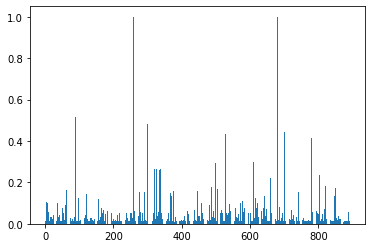

In [18]:
plt.bar(dummy['PassengerId'], dummy['Fare_Scale'])

<BarContainer object of 891 artists>

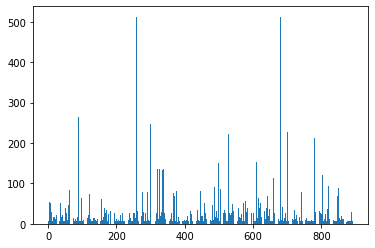

In [30]:
plt.bar(dummy['PassengerId'], dummy['Fare'])

In [32]:
max(dummy['Fare'])
min(dummy['Fare'])

0.0

In [19]:
dummy[dummy['Fare'] > 500]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,AgeRange,AgeRange_0,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,Family,Fare_Scale
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C,1,0,0,30,0,0,0,1,0,0,0,0,0,0,1.0
679,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,0,30,0,0,0,1,0,0,0,0,0,1,1.0
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C,1,0,0,30,0,0,0,1,0,0,0,0,0,0,1.0


In [34]:
dummy[dummy['Fare'] == 0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,Family,Fare_Scale
179,180,0,3,male,36.000000,0,0,LINE,0.0,NaN,...,0,0,1,0,0,0,0,0,0,0.0
263,264,0,1,male,40.000000,0,0,112059,0.0,B94,...,0,0,0,1,0,0,0,0,0,0.0
271,272,1,3,male,25.000000,0,0,LINE,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0.0
277,278,0,2,male,29.699118,0,0,239853,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0.0
302,303,0,3,male,19.000000,0,0,LINE,0.0,NaN,...,1,0,0,0,0,0,0,0,0,0.0
413,414,0,2,male,29.699118,0,0,239853,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0.0
466,467,0,2,male,29.699118,0,0,239853,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0.0
481,482,0,2,male,29.699118,0,0,239854,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0.0
597,598,0,3,male,49.000000,0,0,LINE,0.0,NaN,...,0,0,0,1,0,0,0,0,0,0.0
633,634,0,1,male,29.699118,0,0,112052,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0.0


In [35]:
dummy[dummy['Fare'] > 200]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeRange_10,AgeRange_20,AgeRange_30,AgeRange_40,AgeRange_50,AgeRange_60,AgeRange_70,AgeRange_80,Family,Fare_Scale
27,28,0,1,male,19.000000,3,2,19950,263.0000,C23 C25 C27,...,1,0,0,0,0,0,0,0,1,0.513342
88,89,1,1,female,23.000000,3,2,19950,263.0000,C23 C25 C27,...,0,1,0,0,0,0,0,0,1,0.513342
118,119,0,1,male,24.000000,0,1,PC 17558,247.5208,B58 B60,...,0,1,0,0,0,0,0,0,1,0.483128
258,259,1,1,female,35.000000,0,0,PC 17755,512.3292,NaN,...,0,0,1,0,0,0,0,0,0,1.000000
299,300,1,1,female,50.000000,0,1,PC 17558,247.5208,B58 B60,...,0,0,0,0,1,0,0,0,1,0.483128
311,312,1,1,female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,...,1,0,0,0,0,0,0,0,1,0.512122
341,342,1,1,female,24.000000,3,2,19950,263.0000,C23 C25 C27,...,0,1,0,0,0,0,0,0,1,0.513342
377,378,0,1,male,27.000000,0,2,113503,211.5000,C82,...,0,1,0,0,0,0,0,0,1,0.412821
380,381,1,1,female,42.000000,0,0,PC 17757,227.5250,NaN,...,0,0,0,1,0,0,0,0,0,0.444099
438,439,0,1,male,64.000000,1,4,19950,263.0000,C23 C25 C27,...,0,0,0,0,0,1,0,0,1,0.513342


In [16]:
titanic['IsAdult'] = titanic['Age'].apply(lambda age: 1 if age > 20 else 0)
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
886,887,0,2,male,27.000000,0,0,211536,13.00,NaN,S,1
887,888,1,1,female,19.000000,0,0,112053,30.00,B42,S,0
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,male,26.000000,0,0,111369,30.00,C148,C,1
890,891,0,3,male,32.000000,0,0,370376,7.75,NaN,Q,1


get_dummies 를 사용하지 않고 Pclass 구분
sibsp parch 그룹화 > 가족유무 -> 원핫인코딩
10대, 20대, 30대 나이 구분 -> 원핫인코딩
Cabin 구분 > NaN 있는 데이터, 없는 데이터
scaling
Fare > 0~1 로 맞추기